<a href="https://colab.research.google.com/github/AISaturdaysLagos/Cohort8-Anomah-Ngu/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

'''Add a shortcut of the Team Anomah-Ngu folder to 'My Drive' on your device
Then run the os.environ line to set the environment variables'''
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Team Anomah-Ngu/Datasets"

In [ ]:

#download the kaggle dataset using the API link
!kaggle competitions download -c digit-recognizer

 72% 11.0M/15.3M [00:00<00:00, 114MB/s]
100% 15.3M/15.3M [00:00<00:00, 136MB/s]


In [ ]:
!ls

digit-recognizer.zip  gdrive  sample_data


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!kaggle datasets download -d avnishnish/mnist-original

mnist-original.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#list info about the file
!ls

gdrive	mnist-original.zip  sample_data  sample_submission.csv	test.csv  train.csv


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  mnist-original.zip
  inflating: mnist-original.mat      


In [ ]:

#import needed libraries and read the datasets
import pandas as pd
import scipy
test_data = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/Datasets/test.csv')
train_data = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/Datasets/train.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from scipy.io import loadmat
import pandas as pd
#convert mat file to dataframe first
data = loadmat(r"/content/gdrive/MyDrive/Team Anomah-Ngu/Datasets/mnist-original.mat")
data  = {k:v for k, v in data.items() if k[0] != '_'}
df = pd.DataFrame({k: pd.Series(v[0]) for k, v in data.items()})
#convert dataframe to csv file
df.to_csv("mnist_og.csv")
#read the now created CSV file
mnist_og = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/Datasets/mnist_og.csv')
mnist_og

,Unnamed: 0,mldata_descr_ordering,data,label
0,0,['label'],0,0.0
1,1,['data'],0,0.0
2,2,NaN,0,0.0
3,3,NaN,0,0.0
4,4,NaN,0,0.0
...,...,...,...,...
69995,69995,NaN,0,9.0
69996,69996,NaN,0,9.0
69997,69997,NaN,0,9.0
69998,69998,NaN,0,9.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install arff

  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4949 sha256=00cf5b75e53355bd8541a435552ea6d471cb3e50600d62cfa96e13fa3c3175ce
  Stored in directory: /root/.cache/pip/wheels/0c/39/12/4d8ff491018bce2dd9cc6034298f27399c7f4fd4063187f7be
Successfully built arff


Data Cleaning and preprocessing

In [ ]:
print(test_data.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [ ]:
print(train_data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


We see that the train_data has one more column than the test data which is the 'label' column




In [ ]:
#Saving copies of the uncleaned dataframes
test_data_copy = test_data
train_data_copy = train_data

In [ ]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


We see that both datasets only have int type entries

In [ ]:
#Check for total sum of null values
test_data.isnull().sum().sum()

0

Ooh..Didn't think that would work initially but it works to make sure there's no null value somewhere in the middle.

In [ ]:
train_data.isnull().sum().sum()

0

In [ ]:
#Check for duplicated values
test_data.duplicated().sum()

0

In [ ]:
train_data.duplicated().sum()

0

In [ ]:
mnist_og_copy = mnist_og

In [ ]:
mnist_og.describe()

,Unnamed: 0,data,label
count,70000.000000,70000.0,70000.000000
mean,34999.500000,0.0,4.452429
std,20207.403759,0.0,2.890195
min,0.000000,0.0,0.000000
25%,17499.750000,0.0,2.000000
50%,34999.500000,0.0,4.000000
75%,52499.250000,0.0,7.000000
max,69999.000000,0.0,9.000000


In [ ]:
mnist_og.columns

Index(['Unnamed: 0', 'mldata_descr_ordering', 'data', 'label'], dtype='object')

In [ ]:
mnist_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             70000 non-null  int64  
 1   mldata_descr_ordering  2 non-null      object 
 2   data                   70000 non-null  int64  
 3   label                  70000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


The mldata_descr_ordering has 69998 null values

In [ ]:
mnist_og['data'] = mnist_og['data'].astype(float)

In [ ]:
mnist_og.duplicated().sum()

0

In [ ]:
mnist_og.isnull().sum()

Unnamed: 0                   0
mldata_descr_ordering    69998
data                         0
label                        0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
test_data_2 = pd.read_csv(r"/content/drive/MyDrive/Team Anomah-Ngu/Datasets/Additional data/test-digits.csv")
train_data_2 = pd.read_csv("/content/drive/MyDrive/Team Anomah-Ngu/Datasets/Additional data/train-digits.csv")

In [ ]:
test_data_2.head()

,pixel:x=0:y=0,pixel:x=1:y=0,pixel:x=2:y=0,pixel:x=3:y=0,pixel:x=4:y=0,pixel:x=5:y=0,pixel:x=6:y=0,pixel:x=7:y=0,pixel:x=8:y=0,pixel:x=9:y=0,...,pixel:x=7:y=15,pixel:x=8:y=15,pixel:x=9:y=15,pixel:x=10:y=15,pixel:x=11:y=15,pixel:x=12:y=15,pixel:x=13:y=15,pixel:x=14:y=15,pixel:x=15:y=15,class
0,-0.990539,-0.847837,-0.516411,-0.002182,0.517510,0.841855,0.930999,0.849241,0.622065,0.258198,...,0.598047,0.690059,0.767544,0.820035,0.722530,0.341817,-0.206958,-0.670893,-0.930388,0
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.981506,-0.781704,-0.379141,0.156481,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.994385,-0.858274,-0.501610,-0.072618,0.264851,1
2,-0.679347,-0.442710,-0.076310,0.330831,0.532830,0.317525,-0.225391,-0.744015,-0.980621,-1.000000,...,0.557916,0.559014,0.526940,0.432120,0.274861,0.087663,-0.069078,-0.185443,-0.272999,2
3,-1.000000,-0.981567,-0.858854,-0.605951,-0.272358,0.005570,0.019516,-0.284474,-0.699641,-0.949615,...,0.464683,0.454734,0.418601,0.378073,0.323781,0.193133,-0.051865,-0.328939,-0.558679,3
4,-0.168902,0.199298,0.228840,-0.189258,-0.728634,-0.992309,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.881468,-0.430625,0.146685,0.628046,4


In [ ]:
test_data_2.shape

(1796, 257)

In [ ]:
train_data_2.shape

(1893, 257)

In [ ]:
test_data_2.describe()

,pixel:x=0:y=0,pixel:x=1:y=0,pixel:x=2:y=0,pixel:x=3:y=0,pixel:x=4:y=0,pixel:x=5:y=0,pixel:x=6:y=0,pixel:x=7:y=0,pixel:x=8:y=0,pixel:x=9:y=0,...,pixel:x=7:y=15,pixel:x=8:y=15,pixel:x=9:y=15,pixel:x=10:y=15,pixel:x=11:y=15,pixel:x=12:y=15,pixel:x=13:y=15,pixel:x=14:y=15,pixel:x=15:y=15,class
count,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,...,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,-0.824039,-0.774903,-0.703927,-0.615954,-0.525595,-0.443284,-0.373973,-0.323237,-0.293252,-0.283309,...,-0.356950,-0.382382,-0.422959,-0.472989,-0.525388,-0.578793,-0.636148,-0.694111,-0.744743,4.494432
std,0.334643,0.356150,0.383319,0.413622,0.437079,0.452289,0.462281,0.464595,0.461077,0.454416,...,0.499477,0.492839,0.485460,0.477919,0.467193,0.454083,0.447180,0.444740,0.436312,2.870554
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-0.989205,-0.917342,-0.846112,-0.754910,-0.699367,-0.675464,...,-0.932761,-0.941024,-0.964538,-0.978935,-0.993301,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
50%,-1.000000,-0.998352,-0.927840,-0.773663,-0.586450,-0.445960,-0.324239,-0.264988,-0.230442,-0.210117,...,-0.309849,-0.359014,-0.427741,-0.534234,-0.661296,-0.755993,-0.893461,-0.990982,-1.000000,4.000000
75%,-0.827771,-0.649660,-0.442839,-0.270000,-0.154544,-0.061700,0.007645,0.035515,0.061196,0.062768,...,0.065797,0.025292,-0.010627,-0.062356,-0.135088,-0.212626,-0.291821,-0.442786,-0.630190,7.000000
max,0.778561,0.769100,0.703029,0.704616,0.721492,0.841855,0.955535,0.944396,0.852110,0.916167,...,0.948943,0.978698,0.921843,0.894682,0.771145,0.655726,0.726802,0.788449,0.916533,9.000000


In [ ]:
train_data_2.describe()

,pixel:x=0:y=0,pixel:x=1:y=0,pixel:x=2:y=0,pixel:x=3:y=0,pixel:x=4:y=0,pixel:x=5:y=0,pixel:x=6:y=0,pixel:x=7:y=0,pixel:x=8:y=0,pixel:x=9:y=0,...,pixel:x=7:y=15,pixel:x=8:y=15,pixel:x=9:y=15,pixel:x=10:y=15,pixel:x=11:y=15,pixel:x=12:y=15,pixel:x=13:y=15,pixel:x=14:y=15,pixel:x=15:y=15,class
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,...,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,-0.832023,-0.778467,-0.699450,-0.596867,-0.488179,-0.392459,-0.318065,-0.267622,-0.238292,-0.227723,...,-0.316594,-0.348966,-0.399005,-0.461841,-0.526236,-0.586602,-0.645579,-0.703010,-0.752678,4.492340
std,0.320464,0.355153,0.393907,0.432515,0.466278,0.485350,0.487107,0.481488,0.476912,0.474729,...,0.510272,0.501627,0.493763,0.479643,0.463150,0.447583,0.438223,0.431684,0.420159,2.873582
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-0.996155,-0.925017,-0.820096,-0.694728,-0.620569,-0.609461,...,-0.929808,-0.940826,-0.980407,-0.998260,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
50%,-1.000000,-1.000000,-0.932006,-0.750668,-0.549157,-0.369436,-0.230610,-0.191211,-0.156390,-0.146227,...,-0.201312,-0.258534,-0.320272,-0.479179,-0.635676,-0.758846,-0.905577,-0.996551,-1.000000,4.000000
75%,-0.838163,-0.659174,-0.443168,-0.246571,-0.100542,0.014237,0.076005,0.108873,0.129381,0.131090,...,0.110674,0.075486,0.021469,-0.044358,-0.125841,-0.206043,-0.319814,-0.437644,-0.659754,7.000000
max,0.621302,0.637201,0.760525,0.943755,0.966491,0.926299,0.878904,0.908904,0.953674,0.993164,...,0.950927,0.845487,0.842527,0.833219,0.696895,0.872282,0.865507,0.801266,0.804074,9.000000


In [ ]:
test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Columns: 257 entries, pixel:x=0:y=0 to class
dtypes: float64(256), int64(1)
memory usage: 3.5 MB


In [ ]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Columns: 257 entries, pixel:x=0:y=0 to class
dtypes: float64(256), int64(1)
memory usage: 3.7 MB


In [ ]:
test_data_2.isnull().sum().sum()

0

In [ ]:
train_data_2.isnull().sum().sum()

0

In [ ]:
test_data_2.duplicated().sum()

0

In [ ]:
train_data_2.duplicated().sum()

0

In [ ]:
test_data_file = test_data.to_csv()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cd "/content/gdrive/My Drive/Team Anomah-Ngu/CleanData"

In [ ]:
#Uploading cleaned data to folder
import os
os.makedirs("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData", exist_ok=True)
test_data.to_csv("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData/testData.csv")
test_data_2.to_csv("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData/testData2.csv")
train_data.to_csv("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData/trainData.csv")
train_data_2.to_csv("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData/trainData2.csv")
mnist_og.to_csv("/content/gdrive/My Drive/Team Anomah-Ngu/CleanData/mnist-og.csv")

## Model Building

In [26]:
#Importing pre-processed data

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
test_data = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/CleanData/testData.csv')
test_data_2 = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/CleanData/testData2.csv')
train_data = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/CleanData/trainData.csv')
train_data_2 = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/CleanData/trainData2.csv')
mnist_og = pd.read_csv('/content/gdrive/MyDrive/Team Anomah-Ngu/CleanData/mnist-og.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_data.head()

,Unnamed: 0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_2.head()

,Unnamed: 0,pixel:x=0:y=0,pixel:x=1:y=0,pixel:x=2:y=0,pixel:x=3:y=0,pixel:x=4:y=0,pixel:x=5:y=0,pixel:x=6:y=0,pixel:x=7:y=0,pixel:x=8:y=0,...,pixel:x=7:y=15,pixel:x=8:y=15,pixel:x=9:y=15,pixel:x=10:y=15,pixel:x=11:y=15,pixel:x=12:y=15,pixel:x=13:y=15,pixel:x=14:y=15,pixel:x=15:y=15,class
0,0,-1.000000,-0.973510,-0.850401,-0.614435,-0.324819,-0.076585,0.098924,0.213306,0.281819,...,-0.166155,0.152941,0.314137,0.315450,0.185870,-0.086107,-0.444450,-0.754818,-0.947570,0
1,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.967285,-0.767849,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.985016,-0.859861,-0.601801,-0.343282,-0.178424,1
2,2,-1.000000,-1.000000,-0.997284,-0.936858,-0.766964,-0.515770,-0.264271,-0.093492,-0.002701,...,0.087755,0.029740,-0.012284,-0.046921,-0.089067,-0.113848,-0.135119,-0.171649,-0.230365,2
3,3,-0.528893,-0.416403,-0.327657,-0.318593,-0.334066,-0.278065,-0.144030,-0.173785,-0.455772,...,-0.373220,-0.457145,-0.552544,-0.586511,-0.597009,-0.628077,-0.708522,-0.819242,-0.922515,3
4,4,-0.454704,-0.220478,-0.239246,-0.546014,-0.882780,-0.999237,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.983368,-0.821744,-0.478477,-0.121416,0.119249,4


In [ ]:
#checking the shape of our train data

train_data.shape

(42000, 786)

In [ ]:
#checking the shape of our test data

test_data.shape

(28000, 785)

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4',
       'pixel5', 'pixel6', 'pixel7',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=786)

In [27]:
test_data = test_data.drop(columns="Unnamed: 0")
train_data = train_data.drop(columns="Unnamed: 0")

print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


The train_data has 785 columns, meaning 784 features representing the 28x28 images and the label column. The test data however has no label column and hence can nnot be used. Luckily Tensorflow datasets has the mnist handwritten image dataset and we will be using this

In [28]:
#importing the required libraries

import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras import optimizers

In [29]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
#crosschecking the imported data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


From the results of the code above we can see the data has 60,000 images in 28x28 dimension for X_train and X_test has 10,000 images. our y also has 60,000 for training and 10,000 for testing.

3


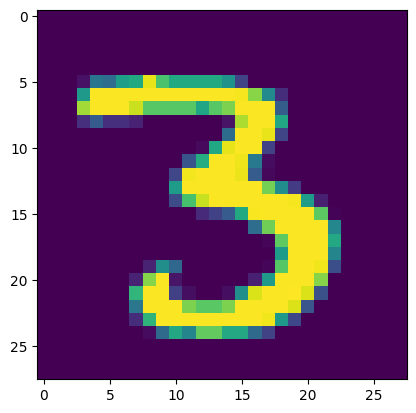

In [30]:
#randomly viewing some images in our data
import matplotlib.pyplot as plt

plt.imshow(X_train[12])
print(y_train[12])


4


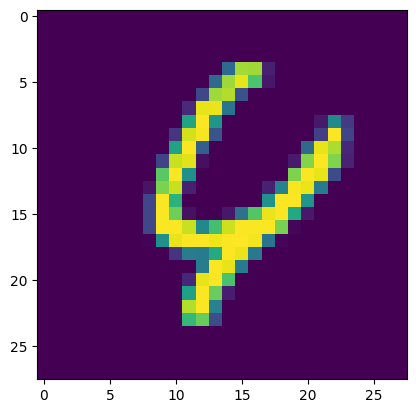

In [31]:
plt.imshow(X_test[121])
print(y_test[121])

Next we prepare our data for the model by normalizing and reshaping

In [32]:
#normalizing the data using tensorflow

X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)



In [33]:
import numpy as np
#reshaping our images
X_trainr = np.array(X_train).reshape(-1,28,28,1) #reshaping to 4-dimension for cnn
X_testr = np.array(X_test).reshape(-1,28,28,1)

In [34]:
# instantiating our model(cnn)
model = Sequential()

#1st convolutional layer
model.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolutional layer
model.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolutional layer
model.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#final fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [35]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(X_trainr,y_train, validation_split=0.3,epochs=5)

Epoch 1/5
1313/1313 [==============================] - 92s 67ms/step - loss: 0.3508 - accuracy: 0.8853 - val_loss: 0.1373 - val_accuracy: 0.9584
Epoch 2/5
1313/1313 [==============================] - 85s 65ms/step - loss: 0.1102 - accuracy: 0.9665 - val_loss: 0.0996 - val_accuracy: 0.9689
Epoch 3/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0789 - accuracy: 0.9765 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0655 - val_accuracy: 0.9807
Epoch 5/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0881 - val_accuracy: 0.9762


In [37]:
loss,accuracy = model.evaluate(X_testr,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.0773 - accuracy: 0.9775
0.07729734480381012
0.9775000214576721


The model has a final accuracy of 98%. This is not too good given the kind of model we used. we will try improving it later. Lets preict with our model using our own image

In [38]:
import cv2
import os



zero


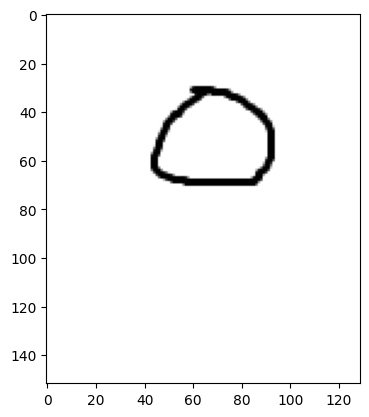

In [40]:
ext = 'png'
names = []
img_list = []
for files in os.listdir('/content/gdrive/MyDrive/Team Anomah-Ngu'):
    if files.endswith(ext):
      name = (str(files)[:-4])
      names.append(name)
      img_list.append(cv2.imread(f'/content/gdrive/MyDrive/Team Anomah-Ngu/{files}'))

print(names[0])
plt.imshow(img_list[0])

In [41]:
#running each image through our model
prediction_list = []

for img in img_list:
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting image to grayscale
  resized = cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA) #resizing image to 28x28
  imgr = tf.keras.utils.normalize(resized,axis=1) #normalizing the image
  imgr =  np.array(imgr).reshape(-1,28,28,1) #reshaping to be recognized by the cnn model
  prediction = np.argmax(model.predict(imgr)) #predicting with our model
  prediction_list.append(prediction)


print(names)
print(prediction_list)

1/1 [==============================] - 0s 21ms/step
['zero', 'four', 'nine', 'one', 'two', 'three', 'eight']
[0, 8, 0, 0, 0, 2, 2]


the number is :zero
the model predicted: 0


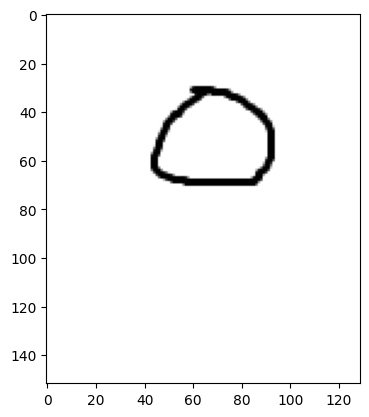

-------------------------------------------------------------------------
the number is :four
the model predicted: 8


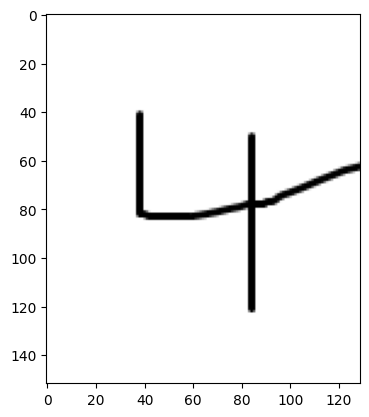

-------------------------------------------------------------------------
the number is :nine
the model predicted: 0


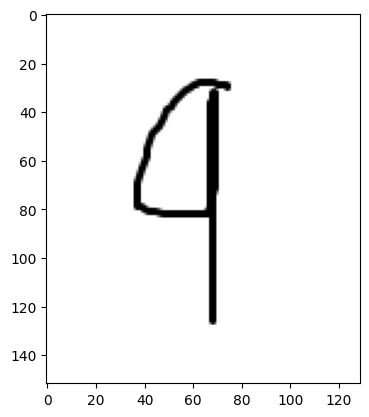

-------------------------------------------------------------------------
the number is :one
the model predicted: 0


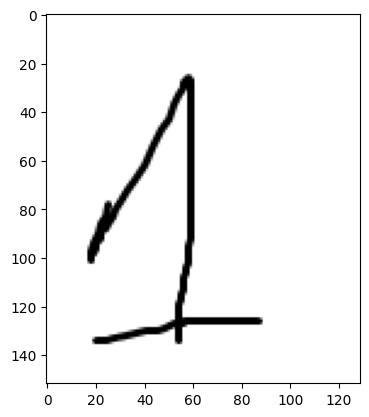

-------------------------------------------------------------------------
the number is :two
the model predicted: 0


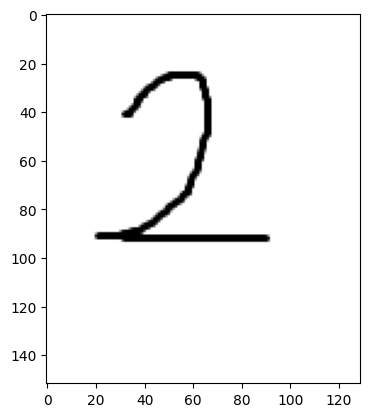

-------------------------------------------------------------------------
the number is :three
the model predicted: 2


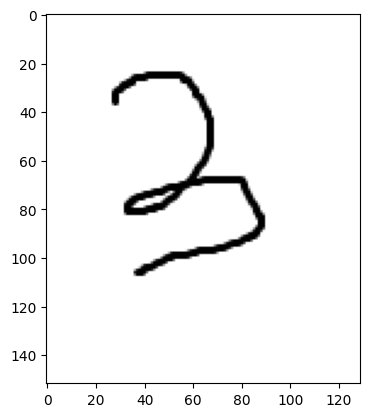

-------------------------------------------------------------------------
the number is :eight
the model predicted: 2


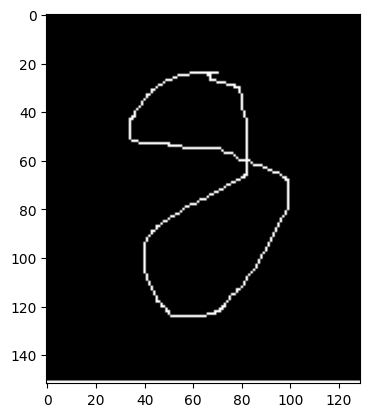

-------------------------------------------------------------------------


In [42]:
for i in range(7):
  print(f'the number is :{names[i]}')
  print(f'the model predicted: {prediction_list[i]}')
  plt.imshow(img_list[i])
  plt.show()
  print("-------------------------------------------------------------------------")

From the result above we can see even though the accuracy was 98%, the model only predicted one correctly from seven. This is very unsatisfactory

### Let's improve our model by increasing the training epoch

In [43]:
# instantiating our model(cnn)
model2 = Sequential()

#1st convolutional layer
model2.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

#2nd convolutional layer
model2.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolutional layer
model2.add(Conv2D(64,(3,3), input_shape=X_trainr.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation("relu"))

#fully connected layer 2
model2.add(Dense(32))
model2.add(Activation("relu"))

#final fully connected layer
model2.add(Dense(10))
model2.add(Activation("softmax"))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [44]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [45]:
model2.fit(X_trainr, y_train, epochs =20)

Epoch 1/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2706 - accuracy: 0.9151
Epoch 2/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0839 - accuracy: 0.9743
Epoch 3/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0617 - accuracy: 0.9808
Epoch 4/20
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0463 - accuracy: 0.9852
Epoch 5/20
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0380 - accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0308 - accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0257 - accuracy: 0.9921
Epoch 8/20
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 9/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 10/20
1875/1875 [==============================] - 90s 48

In [46]:
loss,accuracy = model2.evaluate(X_testr,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.0657 - accuracy: 0.9880
0.06567782908678055
0.9879999756813049


The second model has an accuracy of 0.9879 as opposed to the first one with an


accuracy of 0.977. Let us see if this model will accurately identify our images




In [47]:
#Splitting to features and label
X = train_data.drop(columns="label").values
y = train_data['label'].values



In [48]:
#running each image through our model
prediction_list2 = []

for img in img_list:
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converting image to grayscale
  resized = cv2.resize(gray,(28,28), interpolation=cv2.INTER_AREA) #resizing image to 28x28
  imgr = tf.keras.utils.normalize(resized,axis=1) #normalizing the image
  imgr =  np.array(imgr).reshape(-1,28,28,1) #reshaping to be recognized by the cnn model
  prediction = np.argmax(model2.predict(imgr)) #predicting with our model
  prediction_list2.append(prediction)


print(names)
print(prediction_list2)

1/1 [==============================] - 0s 43ms/step
['zero', 'four', 'nine', 'one', 'two', 'three', 'eight']
[0, 0, 0, 0, 0, 0, 2]


the number is :zero
the model predicted: 0


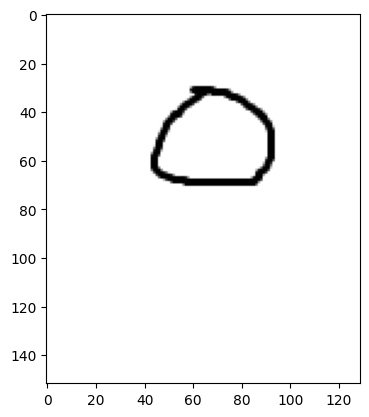

-------------------------------------------------------------------------
the number is :four
the model predicted: 8


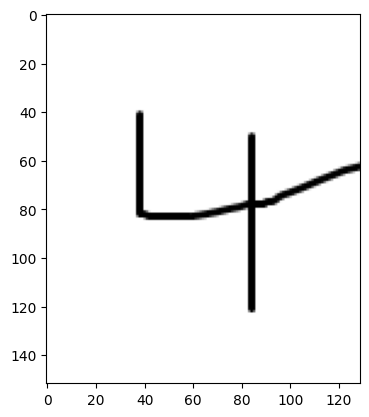

-------------------------------------------------------------------------
the number is :nine
the model predicted: 0


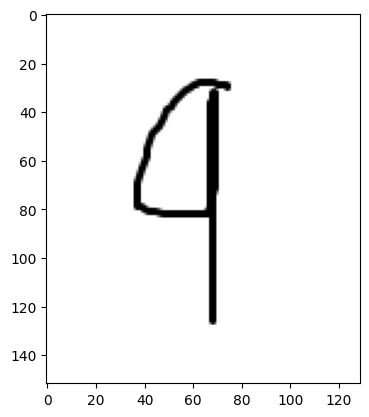

-------------------------------------------------------------------------
the number is :one
the model predicted: 0


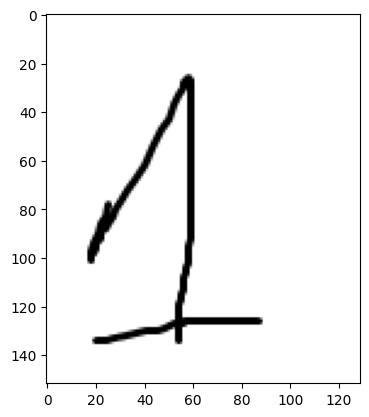

-------------------------------------------------------------------------
the number is :two
the model predicted: 0


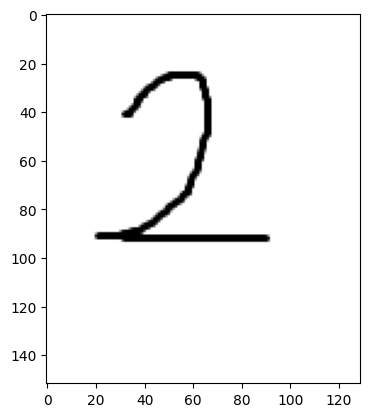

-------------------------------------------------------------------------
the number is :three
the model predicted: 2


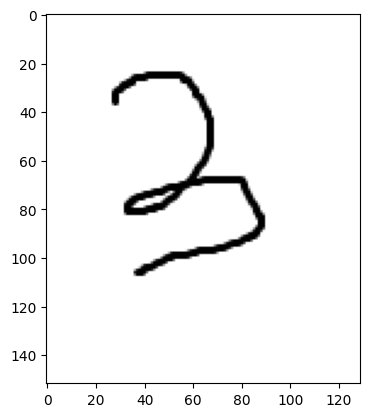

-------------------------------------------------------------------------
the number is :eight
the model predicted: 2


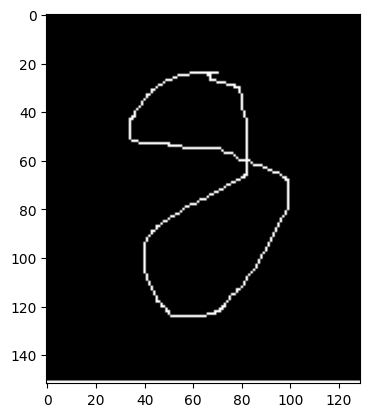

-------------------------------------------------------------------------


In [49]:
for i in range(7):
  print(f'the number is :{names[i]}')
  print(f'the model predicted: {prediction_list[i]}')
  plt.imshow(img_list[i])
  plt.show()
  print("-------------------------------------------------------------------------")